In [1]:
## Exercises
import numpy as np
from function import *
import matplotlib.pyplot as plt
import pandas as pd

/tmp/ipykernel_69126/3915460112.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Week 1

##### Extra problem 7
A reminder on the semiempirical mass formula. Important: do not use the parameter values from the introductory course!

The semiemperical mass formula can be useful in many cases. Make a computer
macro/program (in Python, MATLAB or whatever program you prefer) that calculates the binding energy B in MeV for a given nucleus with mass number A, Z protons (and N neutrons), use equation (5.2) and the parameters given in the caption
of figure 5.1. Then test it by calculating B/A for four nuclei having mass numbers
50, 100, 150 and 200, and compare the result to figure 5.1. To select an appropriate
Z for each A (and to see how B/A varies for each A), do look into the experimental values: the latest mass values are collected in the file massround.mas20.txt
(downloaded from IAEA, references given in the header of the file, note that “mass
excess” is the atomic mass minus A·1u). Discuss the results and the B/A trends

In [1]:
A = np.array([50,100,150,200])
Z = np.array([24,44,62,80]) #found in nuclear card

B_over_A = binding_E(A,Z)/A

fig, ax = plt.subplots()
ax.scatter(A,B_over_A, label = 'Semiemperical mass formula (5.2)')
ax.set_xlim(0,203)
ax.set_ylim(4,10)
ax.legend()

NameError: name 'np' is not defined

Kunne også sammenligne med rigtige ritige værdier for masser, bindingsenergier. Samt plottes alle isotoper for en N. 

Husk også at denne formel 5.2 er pæn når kvantemekaniske effektter ikke er medtaget (skalmodellen).Det er en god model hvis stemmeroverens med rigtige værdier fra masses20.dat, når modellen er så god kan man lave/snakke om størrelses ordner og derved kunne lave første estimationer af halveringstider osv. 

##### Exercise 6

In [12]:
E = 1
R = 2
V0 = E(1+1/np.tan())

TypeError: tan() takes from 1 to 2 positional arguments but 0 were given

# Week 3

## Extra Porblem 8

You saw in the introductory course that the semiemperical mass formula can be used
to give many useful estimates. Try this - analytically or numerically, as you prefer -
on the following two problems: (i) find out how to calculate the neutron separation
energy of a nucleus (equation (8.2)), when will ground state neutron emission be
possible in the heavy Na isotopes? (ii) find the Q-value for alpha emission, when
will this become positive for nuclei along the line of beta-stability (see problem 5.6;
use the experimental binding energy of 28.296 MeV for 4He)?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


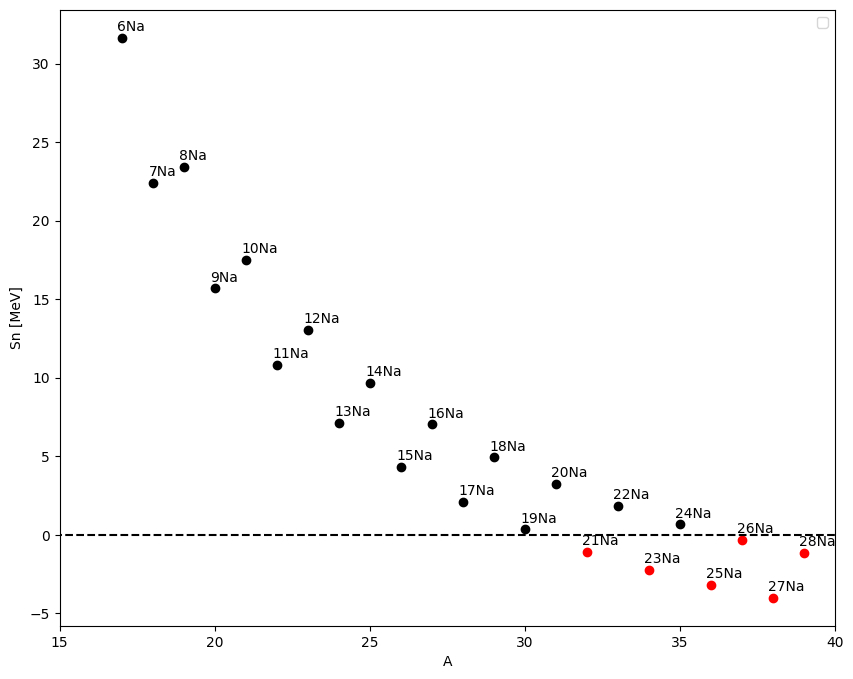

In [24]:
# i)
fig, ax = plt.subplots(figsize=(10,8))
Z = 11
N = np.array([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28])
A = N+Z
Sn = binding_E(A,Z)-binding_E(A-1,Z)

# plt.scatter(A,sn, color='blue')
plt.hlines(0,0,40, ls = 'dashed', color='k')
for a,n,sn in zip(A,N,Sn):
    if sn > 0:
        color = 'k'
    else:
        color = 'red'

    plt.scatter(a,sn,color=color)
    plt.annotate(f'{n}Na',(a,sn),textcoords="offset points", xytext=(-3,5))
    
plt.xlim(15,40)
plt.xlabel('A')
plt.ylabel('Sn [MeV]')
plt.legend()

Der obsereres en systematik, som kommer fra parring elementet i SEMF. Så øverste er lige, mens den nedre er ulige. Mest stabile har med paringen at gøre. 

Det assymetriske led gør at når der er mange neutroner så vil bindingsenergien falde, altså bliver kernen mindre og mindre stabil, mere ustabil.

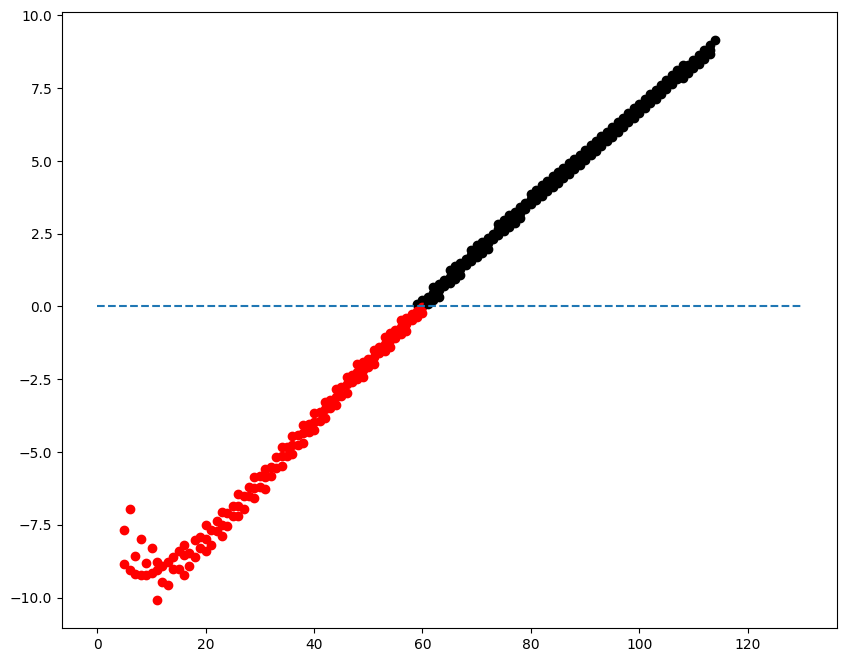

In [26]:
## ii)
fig, ax = plt.subplots(figsize=(10,8))

A = np.linspace(10,300,291)
beta_stability = A/(1.97+0.015*A**(2/3))
Zs_beta_stability = np.round(beta_stability)
Qalpha = Q_alpha(A,Zs_beta_stability)

for zs, qa in zip(Zs_beta_stability,Qalpha):
    if qa<0:
        color = 'red'
        
    else:
        color = 'k'
    
    plt.scatter(zs,qa,color = color)
plt.hlines(0,0,130, ls = 'dashed')

### Execise 9

Lige og ulige effekter, ingen stabile for 43=z hvis skal effekter er med. Hvis bare SEMF er der ike skal effekter, så har optræder alle protoner Z som hadende en stabil udgave.

In [17]:
A = np.linspace(10,300,291)
beta_stability = A/(1.97+0.015*A**(2/3))
sn = binding_E(A,Z)-binding_E(A-1,Z)


In [13]:
f = open('massround.mas20.txt','r')
out = f.readlines() 
line = out[33]
lines = out[34:]
elements = correct_missing_values_in_str(lines)

import pandas as pd
cols = ['NZ', 'N',  'Z', 'A' ,   'el','o',    'mass' , 'unc', 'binding', 'unc',     'B' , 'beta',  'unc' ,  'atomic_mass_first', 'atomic_mass_second',   'unc']
df = pd.DataFrame((elements),columns=cols)
df[['Z', 'N', 'A']] = df[['Z', 'N', 'A']].astype(int)


zs_beta_stability = df['A']/(1.97+0.015*df['A']**(2/3))
zs = np.round(zs_beta_stability)


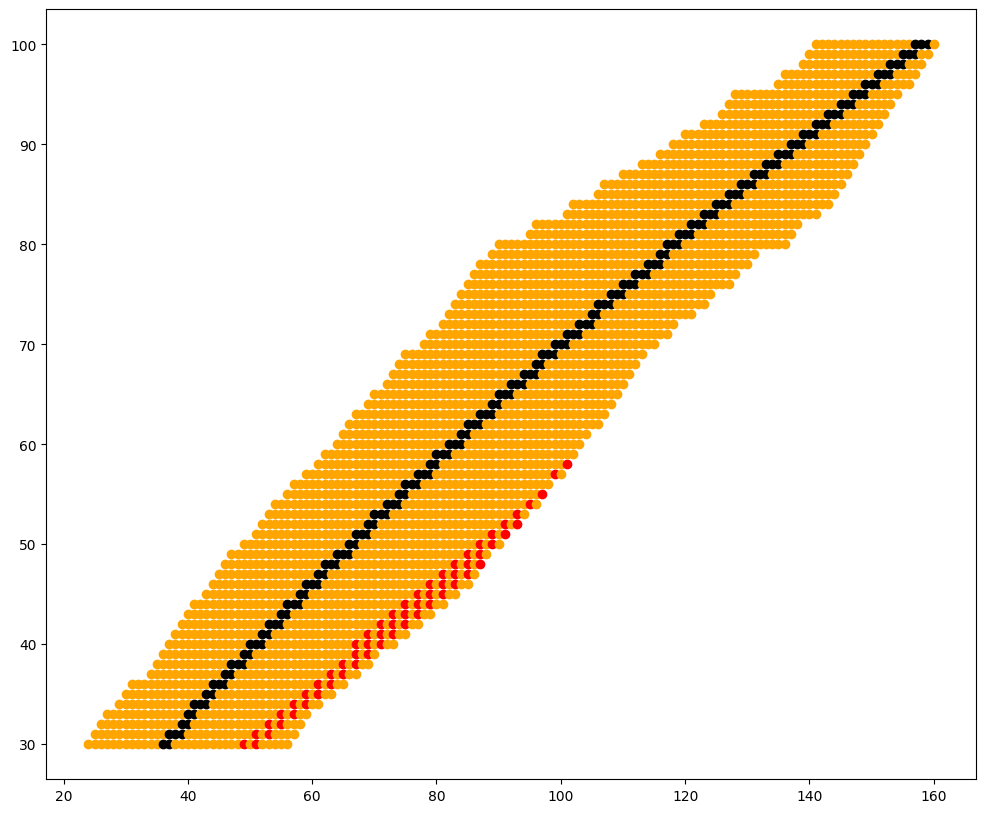

In [25]:
fig, ax = plt.subplots(figsize = (12,10))

# plt.scatter(df['Z'],df['N'], color = 'yellow',alpha = 0.99, s = 3)
# plt.scatter(zs,df['A']-zs,color = 'k', s = 3)

for a,z,n,z_stabil in zip(df['A'],df['Z'],df['N'],zs):
    if z>=30 and z<=100:
        if z==z_stabil:
            color = 'k'
        if z!=z_stabil:
            color = 'orange'

        sn = binding_E(a,z)-binding_E(a-1,z)
        if sn>2 and sn<3:
            color = 'red'
        plt.scatter(n,z,color = color)
        
    